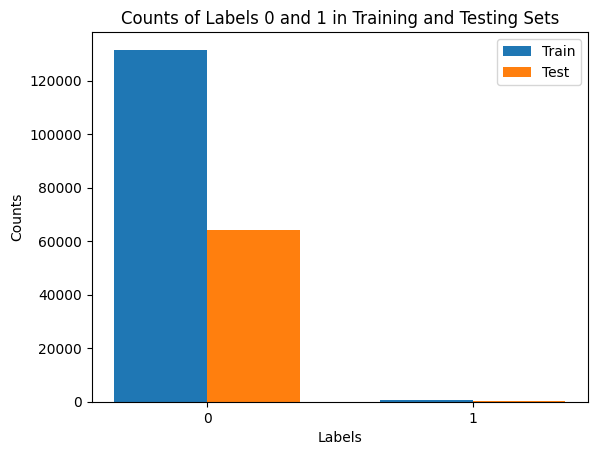

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

train_data = pd.read_csv('train_sample.csv', header=None)
test_data = pd.read_csv('test_sample.csv', header=None)

train_counts = train_data[0].value_counts().sort_index()
test_counts = test_data[0].value_counts().sort_index()

all_categories = sorted(set(train_counts.index).union(test_counts.index))
for category in all_categories:
    if category not in train_counts:
        train_counts.at[category] = 0
    if category not in test_counts:
        test_counts.at[category] = 0

categories = [0, 1]
x = range(len(categories))
width = 0.35

fig, ax = plt.subplots()
train_bars = ax.bar(x, train_counts.loc[categories], width, label='Train')
test_bars = ax.bar([p + width for p in x], test_counts.loc[categories], width, label='Test')

ax.set_xlabel('Labels')
ax.set_ylabel('Counts')
ax.set_title('Counts of Labels 0 and 1 in Training and Testing Sets')
ax.set_xticks([p + width / 2 for p in x])
ax.set_xticklabels([str(cat) for cat in categories])
ax.legend()
plt.savefig('figure_bar.png')

plt.show()
